# Convolutional Neural Networks

Convolutional neural networks, also know as *convnets*, a type of deep-learning model almost universally used in computer vision applications.


### Preparing the data

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

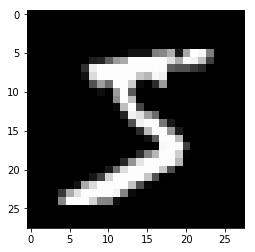

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0], cmap='gray')

In [5]:
## reshaping the images in the format required by Conv2D

X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

In [6]:
## converting labels into one-hot encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
## Normalising the data

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [8]:
X_test.dtype

dtype('float32')

### Building the model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', 
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#### You can even if you dont know what they do... Cool huh!!

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 90s 1ms/step - loss: 0.2643 - acc: 0.9185
Epoch 2/5
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0801 - acc: 0.9752
Epoch 3/5
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0558 - acc: 0.9827
Epoch 4/5
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0428 - acc: 0.9870
Epoch 5/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0334 - acc: 0.9896


In [16]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 420us/step


[0.0532159646718821, 0.9838]

## The convolution operation

The fundamental difference between a densely connected layer and a convolution layer is this: *Dense layers* learn global patterns in their input feature space, whereas *Convolution Layers* learn local patterns.

![](images/cnn.png)

This key characteristic gives convnets to interesting properties:
- *Ther patterns they learn are translation invariant*. After learning a certain pattern, a convnet can recognize it anywhere. A *Dense* network would have to learn the patterns anew if it appeared at a new location. This makes convnets data efficient when processing images (because the visual worls is fundamentally translation invariant): they ned fewer training samples to learn representations that have generalization power.
- *They can learn spacial hierarchies of patterns*. A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layeres, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts (because the visual world is fundamentally spatially hierarchical).

![](images/hierarchical.png)

Lets see what convnets do to achieved all this.

The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an output feature map.

![](images/convolution_.png)

Analogy: think of kernel as a lens. Now start looking at the image from the top left corner, do some calculations and note down the result. Take a step to the right and do the same. Keep repeating this until you reach the right edge of the image. Then take a step south and start again from the left edge. Do this until you have reached the buttom right corner. Heres a .gif showing the process.

![](images/convolution-example-matrix.gif)

This operation is really very powerful and can extract many insightful features from your image. For Example, take a look at this image of 0.

![](images/zero.png)

### Image filters with convolutions

In [35]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc
import numpy as np

In [31]:
img = misc.ascent()

In [32]:
img.shape

(512, 512)

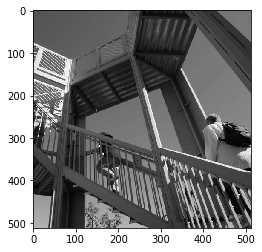

In [33]:
plt.imshow(img, cmap='gray')

In [119]:
h_kernel = np.array([[ 0,  2,  0],
                     [ -1,  0, -1],
                     [ 0,  0,  2]])

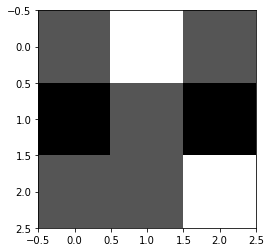

In [120]:
plt.imshow(h_kernel, cmap='gray')

Text(0.5, 1.0, 'original')

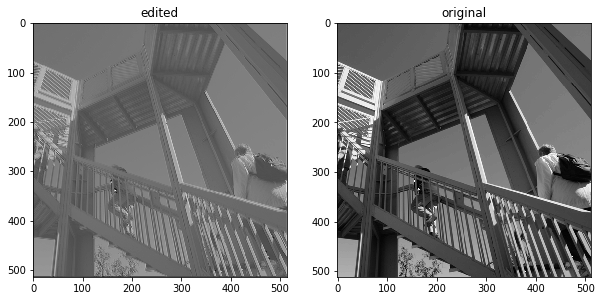

In [121]:
res = convolve2d(img, h_kernel)

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(res, cmap='gray')
plt.title('edited')
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.title('original')

## Convolutional neural networks

In [39]:
from keras.layers import Conv2D

In [40]:
img.shape

(512, 512)

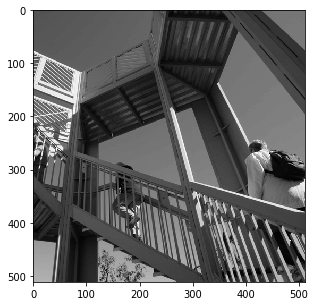

In [41]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [42]:
img_tensor = img.reshape((1, 512, 512, 1))

In [56]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [60]:
img_pred_tensor = model.predict(img_tensor)

In [45]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [61]:
img_pred = img_pred_tensor[0, :, :, 0]

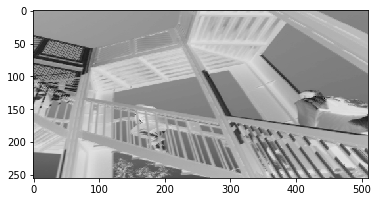

In [62]:
plt.imshow(img_pred, cmap='gray')

In [57]:
weights = model.get_weights()

In [58]:
weights[0].shape

(3, 3, 1, 1)

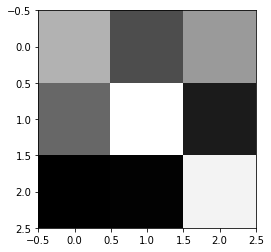

In [59]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [51]:
weights[0] = np.ones(weights[0].shape) ## if you set all the weights to one, them the image is uneffected.

In [52]:
model.set_weights(weights)

In [53]:
img_pred_tensor = model.predict(img_tensor)

In [54]:
img_pred = img_pred_tensor[0, :, :, 0]

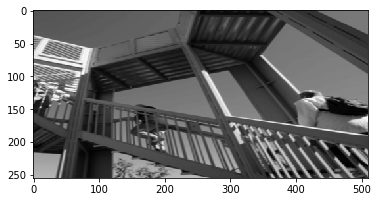

In [55]:
plt.imshow(img_pred, cmap='gray')

You apply a lot of such convolution filter to your images, usually 32 or 64 filters. These filter are called kernels and the output generated by them is called feature maps.

![](images/feature_map.png)

## Pooling layers

![](images/pooling.png)

Pooling layer is used to aggressively downsample feature maps. The reason to use downsampling is to reduce the numver of feature-map coefficients to process, as well as to intduce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows.

There are many ways of achieving downsampling
- max pooling
- average pooling
- min pooling, etc

Out of all the pooling techniques available, MaxPooling works best in practice.

In [66]:
from keras.layers import MaxPool2D, AvgPool2D

In [67]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [68]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

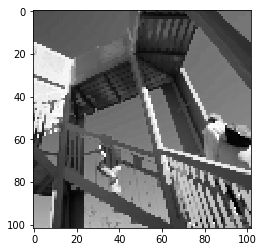

In [69]:
plt.imshow(img_pred, cmap='gray')

In [70]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

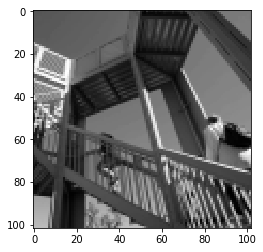

In [71]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

Now, I guess, you have pretty good idea of all the different components of Convnets. Lets go back and review the CNN we have created to solve MNIST multi-class classification problem.

### Putting it all together
![](images/total.png)